In [ ]:
import os
from matplotlib import pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

You can estimate how fast a network prediction can be calculated by calculating the number of floating point operations performed in the network. This package is a handy tool to do it. Use it like this `print(get_flops(my_model))` where `my_model` is your KERAS neural network model. 

In [ ]:
!pip install keras-flops
from keras_flops import get_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading the data (1 signal data file and 5 noise data files)

In [ ]:
# download data file that contains signal events
!gdown https://drive.google.com/uc?id=1t-1icmiJ8Nwu1dm_USIc_W13B68QDwqq


Downloading...
From: https://drive.google.com/uc?id=1t-1icmiJ8Nwu1dm_USIc_W13B68QDwqq
To: /content/trimmed100_data_signal_3.6SNR_1ch_0000.npy
100% 80.0M/80.0M [00:00<00:00, 293MB/s]


In [ ]:
# download data file that contains noise events
!gdown https://drive.google.com/uc?id=14Aff8wf-e1qTQwWU0I-PkrbdbdtS6dei
!gdown https://drive.google.com/uc?id=1EkhWgOXOvaK74JiWPOxt6DUE4S5NGYrT
!gdown https://drive.google.com/uc?id=1BSPvbNOJ2kG7p3ImsVekz4jwXUqlhLRd
!gdown https://drive.google.com/uc?id=1xoTjcJd762XUAP0I7Ukv0y2go6ZwTmIa
!gdown https://drive.google.com/uc?id=1CAmatsbjLmhefxvoH4fr7O-8pGA5p4KY

Downloading...
From: https://drive.google.com/uc?id=14Aff8wf-e1qTQwWU0I-PkrbdbdtS6dei
To: /content/trimmed100_data_noise_3.6SNR_1ch_0000.npy
100% 80.0M/80.0M [00:00<00:00, 302MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EkhWgOXOvaK74JiWPOxt6DUE4S5NGYrT
To: /content/trimmed100_data_noise_3.6SNR_1ch_0001.npy
100% 80.0M/80.0M [00:00<00:00, 213MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BSPvbNOJ2kG7p3ImsVekz4jwXUqlhLRd
To: /content/trimmed100_data_noise_3.6SNR_1ch_0002.npy
100% 80.0M/80.0M [00:00<00:00, 233MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xoTjcJd762XUAP0I7Ukv0y2go6ZwTmIa
To: /content/trimmed100_data_noise_3.6SNR_1ch_0003.npy
100% 80.0M/80.0M [00:00<00:00, 185MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CAmatsbjLmhefxvoH4fr7O-8pGA5p4KY
To: /content/trimmed100_data_noise_3.6SNR_1ch_0004.npy
100% 80.0M/80.0M [00:00<00:00, 253MB/s]


Load the data into memory and combine it into one array. 

In [ ]:
# load signal and noise data set into memory
noise = np.load("trimmed100_data_noise_3.6SNR_1ch_0000.npy")
for i in range(1,5):
  noise = np.vstack((noise,np.load(f"trimmed100_data_noise_3.6SNR_1ch_000{i}.npy")))
signal = np.load("trimmed100_data_signal_3.6SNR_1ch_0000.npy")
n_classes = 2

In [ ]:
# combine noise and signal data set
x = np.vstack((noise, signal))
print(x.shape)
# in case you want to train a CNN, you need to add an empty dimension to the array
# which you can do via x = np.expand_dims(x, axis=-1)  

# define labels. As we have only two categories, we don't use one-hot encoding
# but can just use "0" for noise and "1" for signal. 
y = np.ones(len(x))
y[:len(noise)] = 0

(599997, 100)


Currently, the training data first contains all noise events and then only signal events. This is not optimal, especially because Keras will pick the last X% of the data set for the validation data (which would mean we train only on noise and then validate with signal, which does not make much sense). Therefore, we randomly shuffle the dataset. Important: The x and y arrays need to be shuffled identicially as in the code below. 

In [ ]:
# shuffel the data
shuffle = np.arange(x.shape[0], dtype=np.int)
np.random.shuffle(shuffle)
x = x[shuffle]
y = y[shuffle]

print(x.shape)
print(y.shape)

# to still be able to identify the signal events you can do
smask = y == 1
# then you can get all signal events via `x[smask]`
# and all noise events via `x[~smask]`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(599997, 100)
(599997,)


SIGNALS:


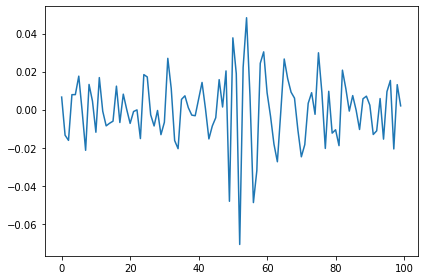

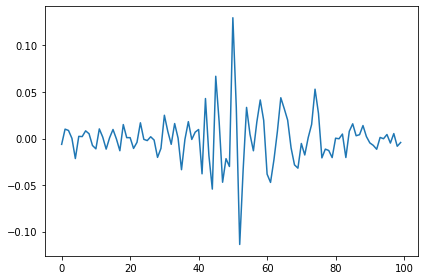

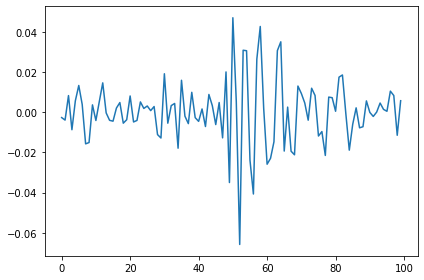

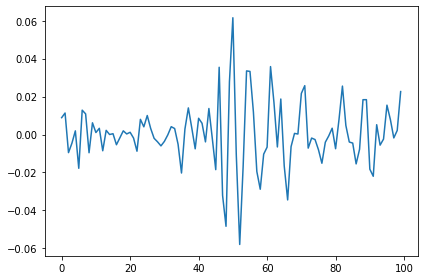

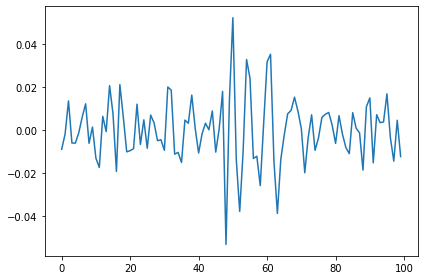

NOISE:


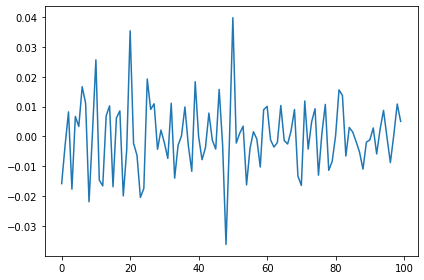

(599997, 100)


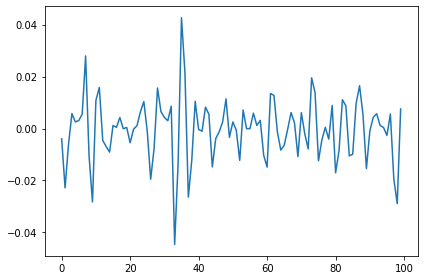

(599997, 100)


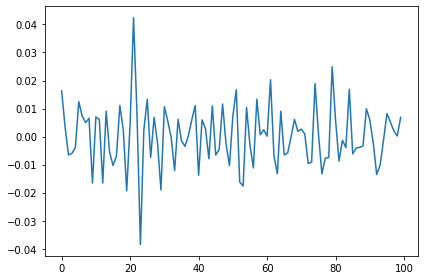

(599997, 100)


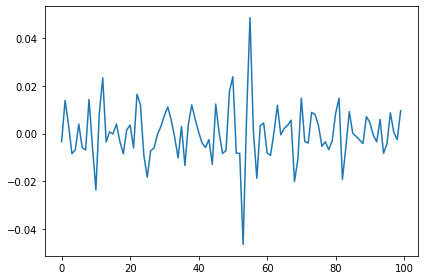

(599997, 100)


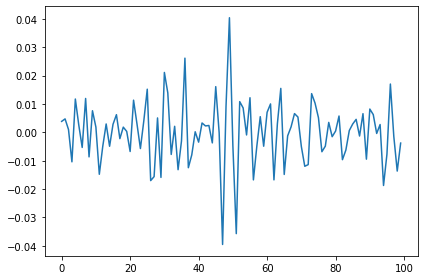

(599997, 100)


In [ ]:
# plot a few signal events
print('SIGNALS:')
for trace in x[smask][:5]:
  fig, ax = plt.subplots(1, 1)
  ax.plot(trace)
  fig.tight_layout()
  plt.show()

print('NOISE:')
# plot a few noise events
for trace in x[~smask][:5]:
  fig, ax = plt.subplots(1, 1)
  ax.plot(trace)
  fig.tight_layout()
  plt.show()

  print(x.shape)

# 1
Plot a few signal and noise events. Do you see a difference between them?

*Looking as the plots of both signals and noises above, one can observe a different pattern within the graph. Indeed noise signal only contain a localised individual peak whereas the real "signal" signals present a localised "wavelet" that contains several peak then larger than noise signals.*

# 2
Implement and train a neural network to differentiate signal from noise (classification task).

*The created network is a dense network with 3 hidden layers of 100, 100 and 50 neurons. The results after 10 epochs (low quantity of epoch for processing time reasons) in terms of loss and accuracy are given below*

*Note: the loss value of 0 for an accuracy around 80% doesn't make any sense to me, however I could'nt find anything wrong with my network, code or dataset... and this cost me a lot of time... I have now to leave it this way because I cannot find my mistake and this already cost me to deliver latw...*

In [ ]:
# validation data
x_train = x[:509997]
x_val = x[509997:]

y_train = y[:509997][:, np.newaxis]
y_val = y[509997:][:, np.newaxis]

# Neural network
model = Sequential()

model.add(Dense(100, activation='relu', input_dim=x.shape[1]))  # first layer # specify input_dim only for very first layer
model.add(Dense(100, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(1, activation = 'sigmoid'))  

print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 100)               10100     
                                                                 
 dense_120 (Dense)           (None, 100)               10100     
                                                                 
 dense_121 (Dense)           (None, 50)                5050      
                                                                 
 dense_122 (Dense)           (None, 1)                 51        
                                                                 
Total params: 25,301
Trainable params: 25,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer= 'adam',
    metrics=['accuracy'])

# train model
results = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=32,
    epochs=10,
    )

Epoch 1/10
15938/15938 [==============================] - 43s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8331 - val_loss: 0.0000e+00 - val_accuracy: 0.8348
Epoch 2/10
15938/15938 [==============================] - 40s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8331 - val_loss: 0.0000e+00 - val_accuracy: 0.8348
Epoch 3/10
15938/15938 [==============================] - 40s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8331 - val_loss: 0.0000e+00 - val_accuracy: 0.8348
Epoch 4/10
15938/15938 [==============================] - 38s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8331 - val_loss: 0.0000e+00 - val_accuracy: 0.8348
Epoch 5/10
15938/15938 [==============================] - 42s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8331 - val_loss: 0.0000e+00 - val_accuracy: 0.8348
Epoch 6/10
15938/15938 [==============================] - 38s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8331 - val_loss: 0.0000e+00 - val_accuracy: 0.8348
Epoch 7/10
15938/15938 [==============================] - 42s 3ms/step

In [ ]:
# evaluate model
print("\n accuracy for the entire dataset is", model.evaluate(x, y)[1])
#labels_predict_onehot = model.predict(x, batch_size=128)

18750/18750 [==============================] - 36s 2ms/step - loss: nan - accuracy: 0.8333

 accuracy for the entire dataset is 0.833337664604187


# 3

Plot the signal efficiency (how many signal events out of all signal events are classified correctly) vs. the noise rejection rate (i.e. how many noise events do you correctly identify as noise events).

# 4
Estimate the execution time of the network by calculating the number of floating point operations of your network. Hint: You can use the function `get_flops(model)` for that. 

*The larger the flops of the network, the heavier is the network computationally. This related to the network itslef (structure, deepness, and so on) but also to the hardware that execute the network (CPU, GPU, cores, etc). The computational power of the machine influence how fast it can run the network. In the purpose of this assignment, regardless of our hardware and power, the goal is to have the network flops below a certain threshold.*

In [ ]:
get_flops(model)

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


50351

# 5

Optimize the network by reducing the number of floating point operations as much as possible while still rejecting 99.9% noise events and keeping a 90% signal efficiency. 